In [1]:
import sys
sys.path.append('C:/Users/golov/OneDrive/Документы/OOP/курсовая/OOP_first_coursework')
import numpy as np
import matplotlib.pyplot as plt
from ML_Library import CNN, Conv2D, MaxPool2D, Flatten, Dense, ReLU, Sigmoid, MSE_Loss

In [2]:
def generate_visual_data(n_samples):
    X = np.zeros((n_samples, 1, 16, 16))  # (batch_size, channels, height, width)
    y = np.zeros((n_samples, 1))
    
    for i in range(n_samples):
        if i < n_samples // 3:
            # Класс 0: горизонтальная линия
            X[i, 0, 7:9, :] = 1
            y[i] = 0
        elif i < 2 * n_samples // 3:
            # Класс 1: вертикальная линия
            X[i, 0, :, 7:9] = 1
            y[i] = 1
        else:
            # Класс 2: диагональная линия
            for j in range(16):
                X[i, 0, j, j] = 1
            y[i] = 2
    
    return X, y

In [3]:
X_train, y_train = generate_visual_data(300)
X_test, y_test = generate_visual_data(30)

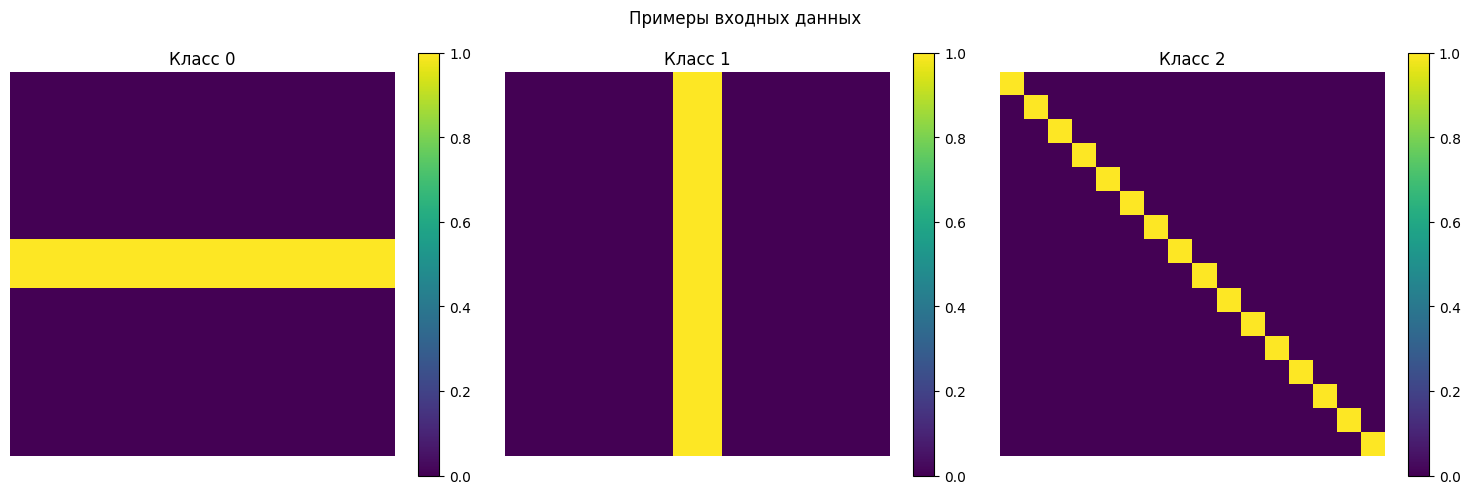

In [4]:
plt.figure(figsize=(15, 5))
objects=[0,100,200]
for i in range(3):
    plt.subplot(1, 3, i+1)
    # Используем 'viridis' цветовую карту для лучшей видимости
    plt.imshow(X_train[objects[i], 0], cmap='viridis', vmin=0, vmax=1)
    plt.title(f'Класс {y_train[objects[i]][0]:.0f}')
    plt.colorbar()  # Добавляем цветовую шкалу
    plt.axis('off')
plt.suptitle('Примеры входных данных')
plt.tight_layout()
plt.show()

In [5]:
def to_one_hot(y, num_classes):
    """Преобразование меток в one-hot encoding"""
    y_one_hot = np.zeros((len(y), num_classes))
    for i in range(len(y)):
        y_one_hot[i, int(y[i])] = 1
    return y_one_hot

In [6]:
y_train_one_hot = to_one_hot(y_train, 3)
y_test_one_hot = to_one_hot(y_test, 3)

C:\Users\golov\AppData\Local\Temp\ipykernel_19424\1314104315.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_one_hot[i, int(y[i])] = 1


In [12]:
# Создание модели
model = CNN()
# Первый сверточный блок
model.add(Conv2D(1, 4, kernel_size=3, padding=1))  # Выход: (batch, 4, 16, 16)
model.add(ReLU())
model.add(MaxPool2D(pool_size=2))  # Выход: (batch, 4, 8, 8)

# Второй сверточный блок
model.add(Conv2D(4, 8, kernel_size=3, padding=1))  # Выход: (batch, 8, 8, 8)
model.add(ReLU())
model.add(MaxPool2D(pool_size=2))  # Выход: (batch, 8, 4, 4)

# Выравнивание и полносвязные слои
model.add(Flatten())  # Выход: (batch, 8*4*4 = 128)
model.add(Dense(128, 64))  # Выход: (batch, 64)
model.add(ReLU())
model.add(Dense(64, 3))  # Выход: (batch, 3) - 3 класса
model.add(Sigmoid())

# Обучение модели
loss_fn = MSE_Loss()

In [13]:
for epoch in range(50):
    epoch_loss = 0
    for i in range(0, len(X_train), 10):
        X_batch = X_train[i:i+10]
        y_batch = y_train_one_hot[i:i+10]  # Используем one-hot encoded метки
        
        output = model.forward(X_batch)
        loss = loss_fn.get_loss(output, y_batch)
        epoch_loss += loss
        
        gradient = loss_fn.get_grad(output, y_batch)
        model.backward(gradient, 0.01)
    if epoch % 10 == 0:
        print(f"Эпоха {epoch}, Потери: {epoch_loss:.4f}")

Эпоха 0, Потери: 7.4811
Эпоха 10, Потери: 6.3949
Эпоха 20, Потери: 3.4443
Эпоха 30, Потери: 0.6299
Эпоха 40, Потери: 0.1650


In [14]:
print("\nТестовые предсказания:")
predictions = model.predict(X_test)
correct = 0
for i in range(len(X_test)):
    pred_class = np.argmax(predictions[i])
    true_class = int(y_test[i][0])
    print(f"Истинное значение: {true_class}, Предсказание: {pred_class}")
    if pred_class == true_class:
        correct += 1
print(f"Точность: {correct / len(X_test):.2f}")


Тестовые предсказания:
Истинное значение: 0, Предсказание: 0
Истинное значение: 0, Предсказание: 0
Истинное значение: 0, Предсказание: 0
Истинное значение: 0, Предсказание: 0
Истинное значение: 0, Предсказание: 0
Истинное значение: 0, Предсказание: 0
Истинное значение: 0, Предсказание: 0
Истинное значение: 0, Предсказание: 0
Истинное значение: 0, Предсказание: 0
Истинное значение: 0, Предсказание: 0
Истинное значение: 1, Предсказание: 1
Истинное значение: 1, Предсказание: 1
Истинное значение: 1, Предсказание: 1
Истинное значение: 1, Предсказание: 1
Истинное значение: 1, Предсказание: 1
Истинное значение: 1, Предсказание: 1
Истинное значение: 1, Предсказание: 1
Истинное значение: 1, Предсказание: 1
Истинное значение: 1, Предсказание: 1
Истинное значение: 1, Предсказание: 1
Истинное значение: 2, Предсказание: 2
Истинное значение: 2, Предсказание: 2
Истинное значение: 2, Предсказание: 2
Истинное значение: 2, Предсказание: 2
Истинное значение: 2, Предсказание: 2
Истинное значение: 2, Пред